Load Dataset

In [345]:
import pandas as pd
df = pd.read_csv("heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Check NAN value

In [346]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Drop Date column

In [347]:
# df.drop("Departure Date", axis=1, inplace=True)
# df.head(10)

No null value so now convert string to numaric

In [348]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


Data Spliting for train(70%) and test(30%)

In [349]:
from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


Scalling Data

In [350]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


Apply KNN Algorithm

Train Model

In [351]:
from sklearn.neighbors import KNeighborsClassifier
#Initialize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
#predictions
y_pred = knn.predict(X_test_scaled)
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

Test Accuracy,Precision,Recall,F1 Score,MAE,AUC Score

In [352]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Display results
print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"AUC Score: {auc:.4f}")

KNN Accuracy: 86.59%
Precision: 0.9097
Recall: 0.8598
F1 Score: 0.8840
Mean Absolute Error: 0.1341
AUC Score: 0.9319


KNN Confusion Matrix

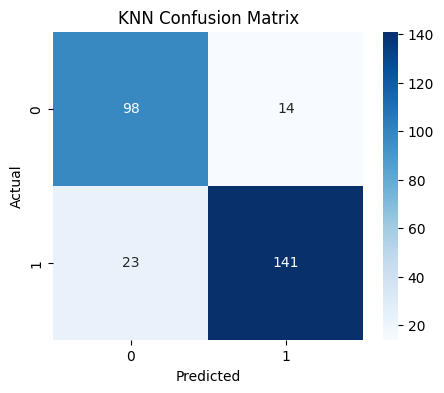

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN Rock Curve

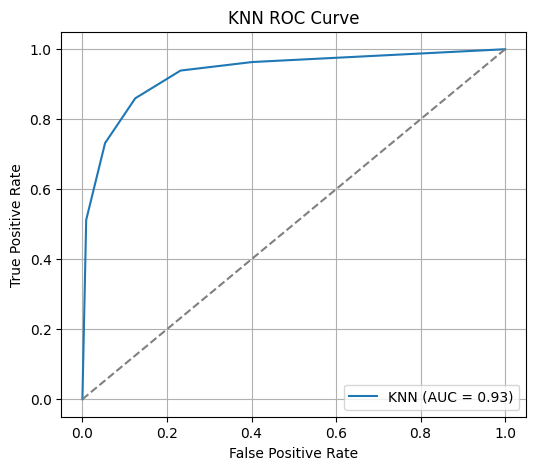

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.grid(True) 
plt.show()

Random Forest Algorithm/Model

Train Model

In [355]:
from sklearn.ensemble import RandomForestClassifier
# Initialize
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

Test Accuracy,Precision,Recall,F1 Score,MAE,AUC Score

In [356]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Print metrics
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"AUC Score: {auc:.4f}")

Random Forest Accuracy: 89.49%
Precision: 0.9245
Recall: 0.8963
F1 Score: 0.9102
Mean Absolute Error: 0.1051
AUC Score: 0.9502


Random Forest Confusion Matrix

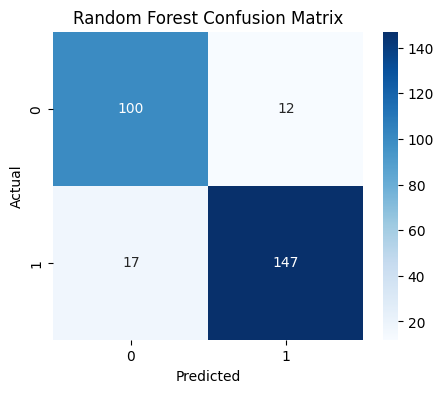

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Rock Curve

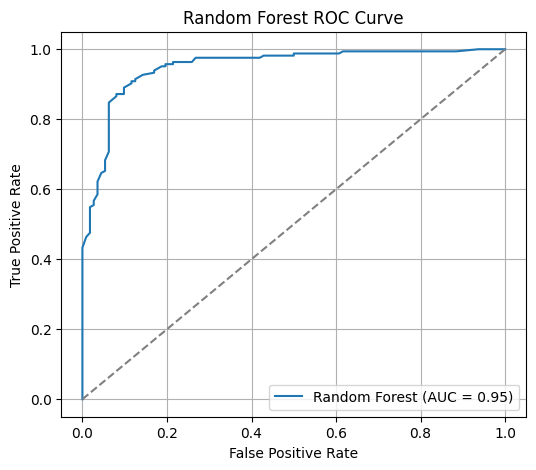

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Decision Tree

Train Model

In [359]:
from sklearn.tree import DecisionTreeClassifier

# Initialize
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

Test Accuracy,Precision,Recall,F1 Score,MAE,AUC Score

In [360]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Print Decision Tree results
print(f"\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_dt * 100:.2f}%")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"MAE: {mae_dt:.4f}")
print(f"AUC: {auc_dt:.4f}")


Decision Tree Metrics:
Accuracy: 77.17%
Precision: 0.8686
Recall: 0.7256
F1 Score: 0.7907
MAE: 0.2283
AUC: 0.7824


Decision Tree Confusion Matrix

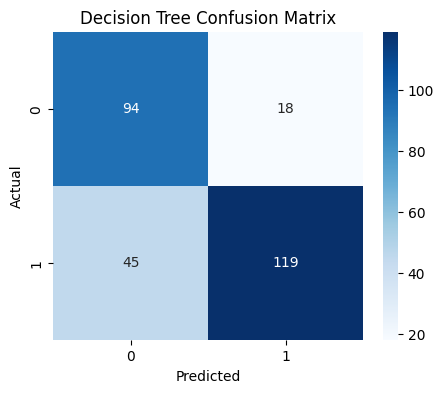

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Rock Curve

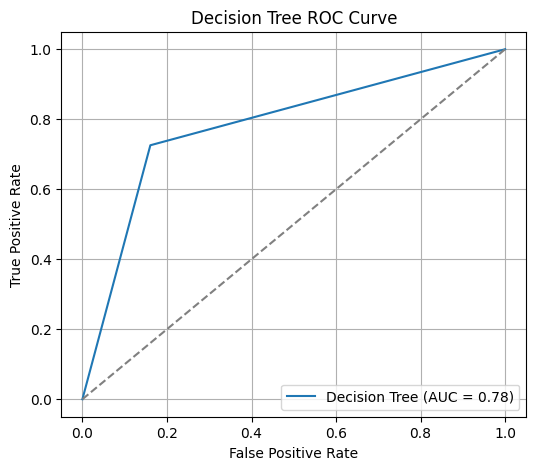

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Support Vector Machine(SVM)

All about SVM


SVM Metrics:
Accuracy: 88.77%
Precision: 0.9130
Recall: 0.8963
F1 Score: 0.9046
MAE: 0.1123
AUC: 0.9526


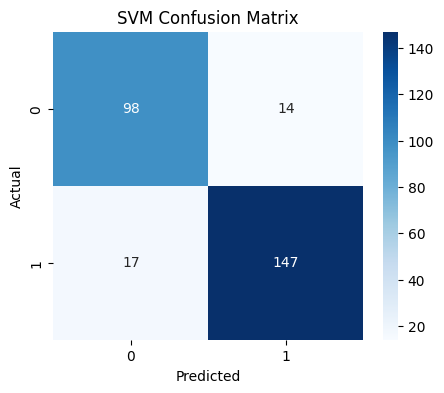

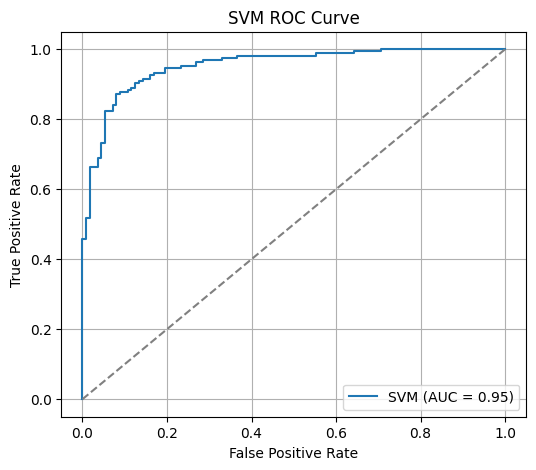

In [363]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score,confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Print SVM results
print(f"\nSVM Metrics:")
print(f"Accuracy: {accuracy_svm * 100:.2f}%")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"MAE: {mae_svm:.4f}")
print(f"AUC: {auc_svm:.4f}")

# Plot Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(6,5))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

MLP Nural Network

All code

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Classifier Metrics:
Accuracy: 89.13%
Precision: 0.9408
Recall: 0.8720
F1 Score: 0.9051
MAE: 0.1087
AUC: 0.9577


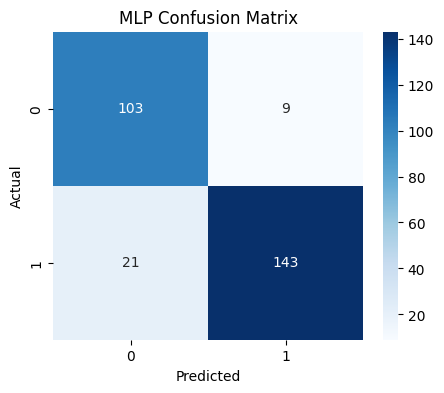

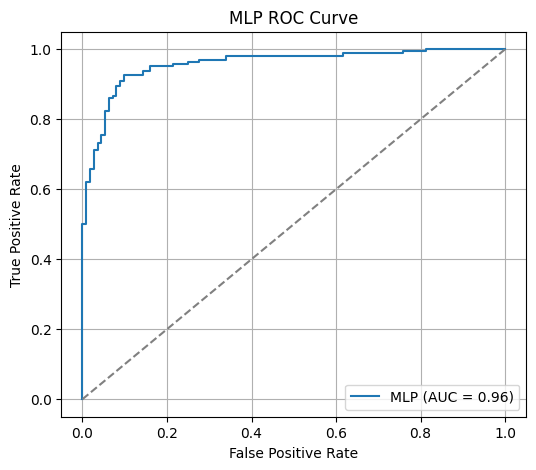

In [364]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score,confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)

# Train MLP
mlp.fit(X_train_scaled, y_train)

# Predict
y_pred_mlp = mlp.predict(X_test_scaled)
y_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]

# Metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_prob_mlp)

# Print MLP results
print(f"\nMLP Classifier Metrics:")
print(f"Accuracy: {accuracy_mlp * 100:.2f}%")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1 Score: {f1_mlp:.4f}")
print(f"MAE: {mae_mlp:.4f}")
print(f"AUC: {auc_mlp:.4f}")

# Plot Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(5,4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
plt.figure(figsize=(6,5))
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Logistic Regression


Logistic Regression Metrics:
Accuracy: 87.68%
Precision: 0.9221
Recall: 0.8659
F1 Score: 0.8931
MAE: 0.1232
AUC: 0.9281


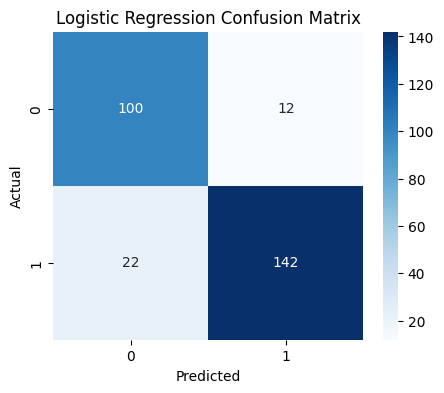

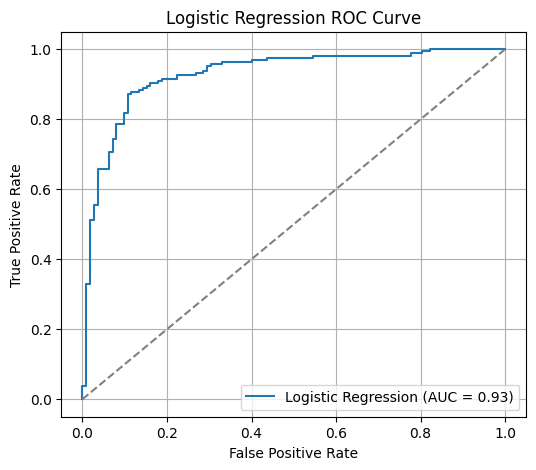

In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score,confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)

# Train model
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Print metrics
print(f"\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr * 100:.2f}%")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"AUC: {auc_lr:.4f}")

# Confusion Matrix plot
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve plot
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Naive Bayes


Naive Bayes Metrics:
Accuracy: 87.32%
Precision: 0.9108
Recall: 0.8720
F1 Score: 0.8910
MAE: 0.1268
AUC: 0.9330


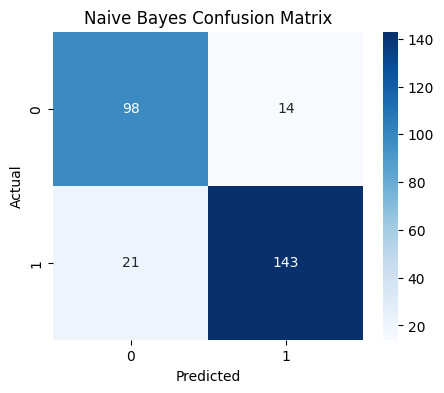

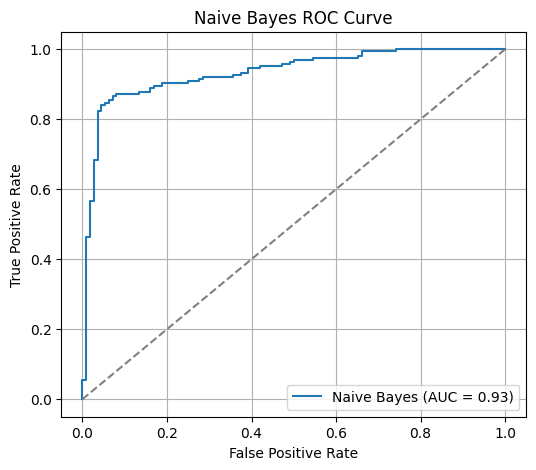

In [366]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score,confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Gaussian Naive Bayes
nb = GaussianNB()

# Train model
nb.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb.predict(X_test_scaled)
y_prob_nb = nb.predict_proba(X_test_scaled)[:, 1]

# Metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
mae_nb = mean_absolute_error(y_test, y_pred_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

# Print metrics
print(f"\nNaive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb * 100:.2f}%")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"MAE: {mae_nb:.4f}")
print(f"AUC: {auc_nb:.4f}")

# Confusion Matrix plot
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve plot
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
plt.figure(figsize=(6,5))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


XGBoost Claassifire

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [16:12:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Metrics:
Accuracy: 85.87%
Precision: 0.9032
Recall: 0.8537
F1 Score: 0.8777
MAE: 0.1413
AUC: 0.9375


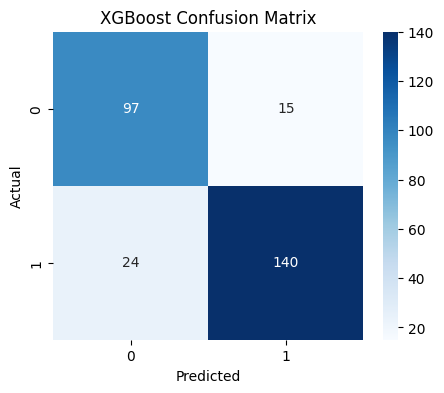

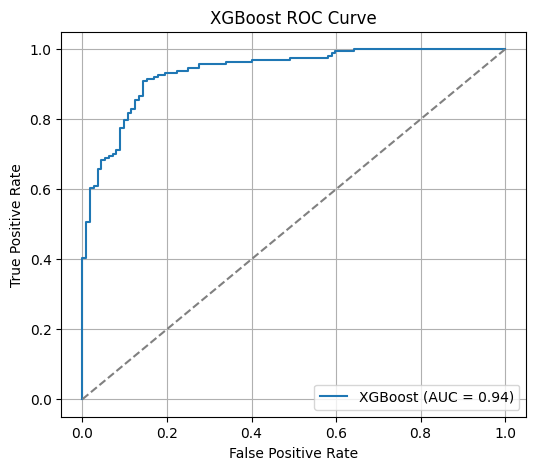

In [367]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train model
xgb_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test_scaled)
y_prob_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]

# Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Print metrics
print(f"\nXGBoost Metrics:")
print(f"Accuracy: {accuracy_xgb * 100:.2f}%")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"AUC: {auc_xgb:.4f}")

# Confusion Matrix plot
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve plot
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Comparison

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [16:12:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



KNN Metrics:
Accuracy: 86.59%
Precision: 0.9097
Recall: 0.8598
F1 Score: 0.8840
MAE: 0.1341
AUC: 0.9319

RF Metrics:
Accuracy: 89.49%
Precision: 0.9245
Recall: 0.8963
F1 Score: 0.9102
MAE: 0.1051
AUC: 0.9502

DT Metrics:
Accuracy: 77.17%
Precision: 0.8686
Recall: 0.7256
F1 Score: 0.7907
MAE: 0.2283
AUC: 0.7824

SVM Metrics:
Accuracy: 88.77%
Precision: 0.9130
Recall: 0.8963
F1 Score: 0.9046
MAE: 0.1123
AUC: 0.9526

LR Metrics:
Accuracy: 87.68%
Precision: 0.9221
Recall: 0.8659
F1 Score: 0.8931
MAE: 0.1232
AUC: 0.9281

NB Metrics:
Accuracy: 87.32%
Precision: 0.9108
Recall: 0.8720
F1 Score: 0.8910
MAE: 0.1268
AUC: 0.9330

XGBoost Metrics:
Accuracy: 85.87%
Precision: 0.9032
Recall: 0.8537
F1 Score: 0.8777
MAE: 0.1413
AUC: 0.9375

MLP Metrics:
Accuracy: 89.13%
Precision: 0.9408
Recall: 0.8720
F1 Score: 0.9051
MAE: 0.1087
AUC: 0.9577

Voting Hard Metrics:
Accuracy: 88.41%
Precision: 0.9231
Recall: 0.8780
F1 Score: 0.9000
MAE: 0.1159

Voting Soft Metrics:
Accuracy: 88.04%
Precision: 0.9226
Re

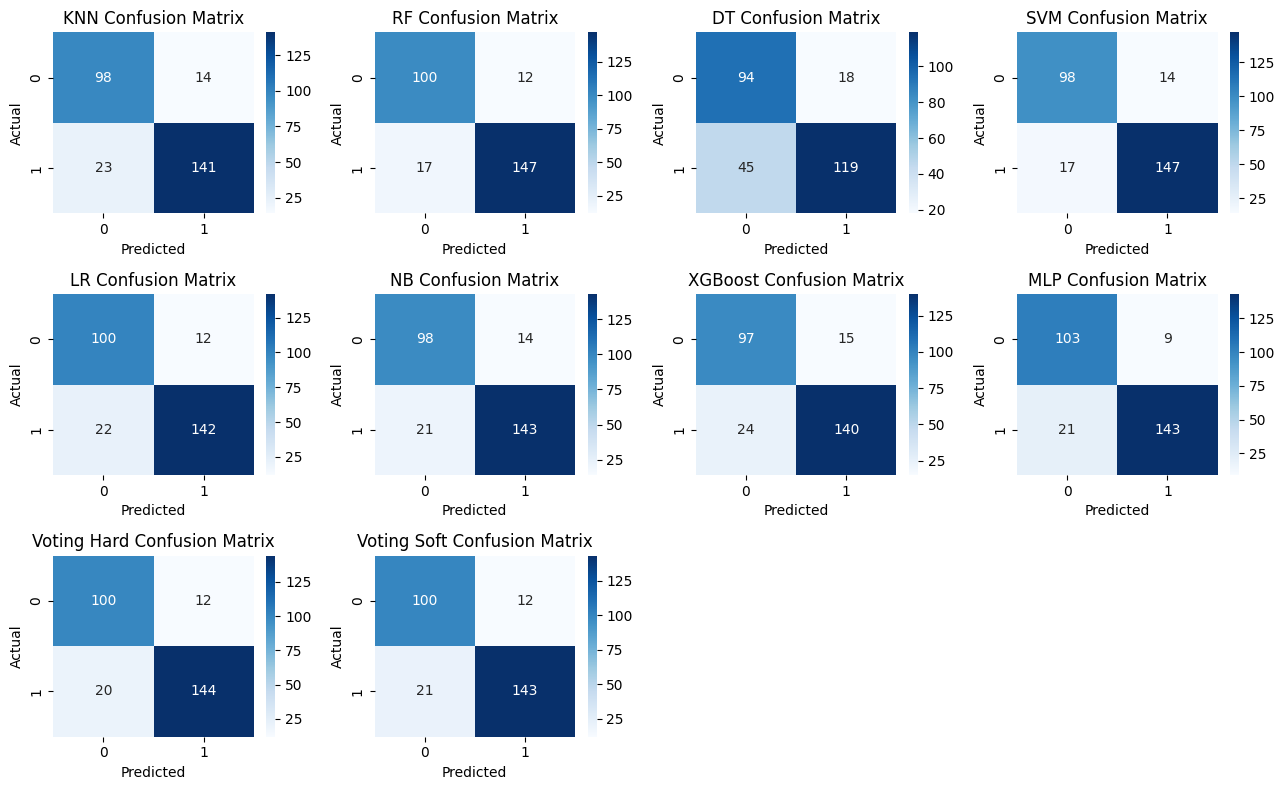

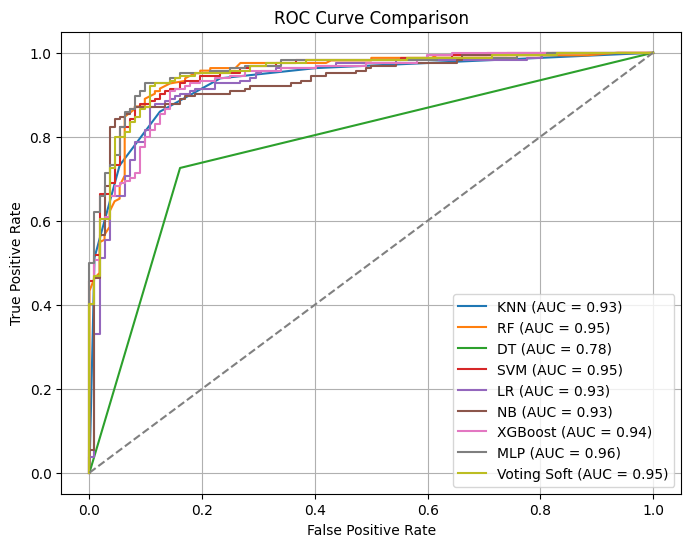

In [368]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_absolute_error, roc_auc_score, confusion_matrix, roc_curve, auc
)

import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42),
    "DT": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "LR": LogisticRegression(random_state=42, max_iter=1000),
    "NB": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)
}

# Add ensemble models (voting)
knn = models["KNN"]
rf = models["RF"]
gb = GradientBoostingClassifier(random_state=42)

voting_hard = VotingClassifier(
    estimators=[('knn', knn), ('rf', rf), ('gb', gb)], voting='hard'
)
voting_soft = VotingClassifier(
    estimators=[('knn', knn), ('rf', rf), ('gb', gb)], voting='soft'
)

models["Voting Hard"] = voting_hard
models["Voting Soft"] = voting_soft

# Fit all models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

# Function to get metrics and predictions
def get_model_results(model, X_test, y_test):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = None
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred),
        "auc": roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        "y_pred": y_pred,
        "y_prob": y_prob,
    }
    return metrics

# Collect results
results = {}
for name, model in models.items():
    results[name] = get_model_results(model, X_test_scaled, y_test)

# Print metrics
for name, res in results.items():
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {res['accuracy']*100:.2f}%")
    print(f"Precision: {res['precision']:.4f}")
    print(f"Recall: {res['recall']:.4f}")
    print(f"F1 Score: {res['f1']:.4f}")
    print(f"MAE: {res['mae']:.4f}")
    if res['auc'] is not None:
        print(f"AUC: {res['auc']:.4f}")

# Plot all confusion matrices in one figure
fig, axes = plt.subplots(3, 4, figsize=(13, 8))
axes = axes.flatten()

for ax, (name, res) in zip(axes, results.items()):
    cm = confusion_matrix(y_test, res['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Hide any unused subplots (if any)
for ax in axes[len(results):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Plot all ROC curves in one figure (skip models without probabilities)
plt.figure(figsize=(8, 6))
for name, res in results.items():
    if res['y_prob'] is not None:
        fpr, tpr, _ = roc_curve(y_test, res['y_prob'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Correletion Matrix

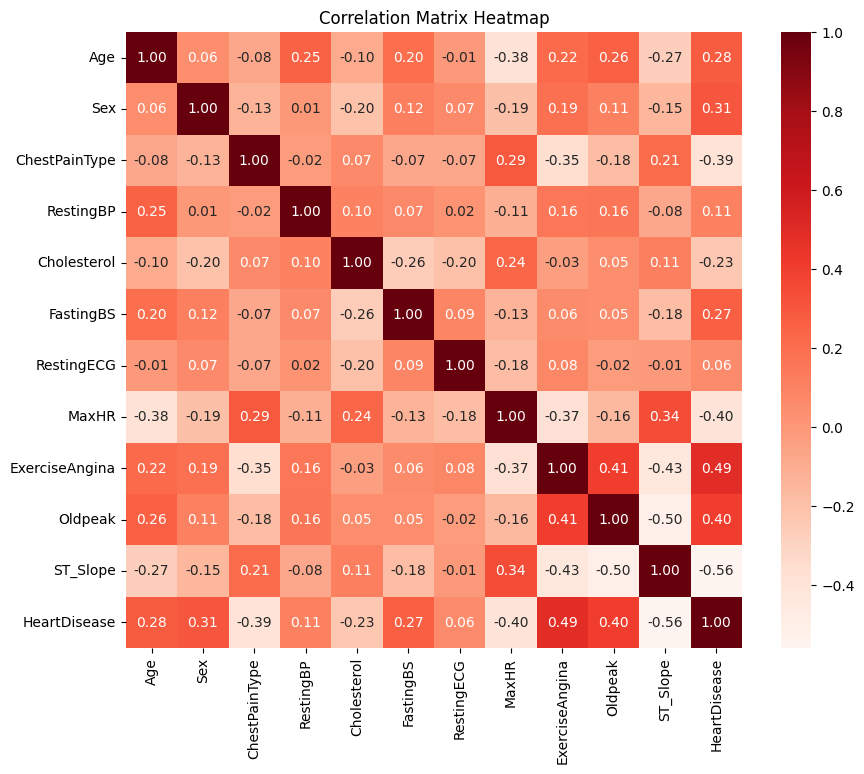

In [369]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Reds', square=True, cbar=True)

plt.title("Correlation Matrix Heatmap")
plt.show()

In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")

sns.kdeplot(data=df, x='age', hue='HeartDisease', shade=True)
plt.title('KDE of Age by Heart Disease')
plt.show()




C:\Users\Asus\AppData\Local\Temp\ipykernel_21740\4178760830.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='age', hue='HeartDisease', shade=True)


ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.